# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
import random
import copy
from collections import namedtuple, deque
from replay_buffer import ReplayBuffer

import tensorflow as tf
from keras import backend as K
from keras.layers import Dense, Input, Add, Activation,LeakyReLU
from keras.layers import GaussianNoise, Dropout, Concatenate
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
from BFSWorld import BFSWorldEnv
from infoCalc import *

Using TensorFlow backend.


### 2. Instantiate the Environment and Agent

In [2]:
sess = tf.Session()
K.set_session(sess)

env = BFSWorldEnv()
env.seed(10)
print(env.action_space.shape[0])
agent = Agent(env, sess,state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
#agent.NetworkSummary()
#agent.load_network('savedModels/', 'saved.h5')

4
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 300	Average Score: 157.24	Score: 711.3065
Episode 600	Average Score: 345.01	Score: 701.2337
Episode 900	Average Score: 637.50	Score: 1997.478
Episode 1200	Average Score: 2511.56	Score: 5648.642
Episode 1500	Average Score: 4121.97	Score: 3429.433
Episode 1800	Average Score: 5950.97	Score: 5902.821
Episode 2100	Average Score: 5607.55	Score: -25.0038
Episode 2400	Average Score: 4820.52	Score: 5366.428
Episode 2700	Average Score: 4546.86	Score: 2231.070
Episode 3000	Average Score: 4551.27	Score: 8432.658
Episode 3300	Average Score: 5700.50	Score: 3801.252
Episode 3600	Average Score: 5863.38	Score: 4439.902
Episode 3900	Average Score: 6226.65	Score: 12992.35
Episode 4200	Average Score: 7131.36	Score: 10696.15
Episode 4500	Average Score: 7124.07	Score: 7527.755
Episode 4800	Average Score: 6707.66	Score: 8150.158
Episode 5000	Average Score: 7008.28	Score: 5892.084

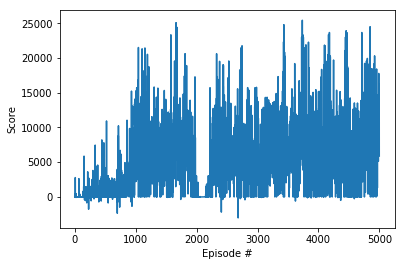

In [3]:
def ddpg(n_episodes=5000, max_t=30):
    scores_deque = deque(maxlen=1000)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        #agent.reset()

        score = 0
        for t in range(max_t):
            #print(t,len(env.StateBuffer),state,score)
            action = agent.act(state,True)
            #print(t,len(env.StateBuffer),state,score,action)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            #print(score)
            #env.render()
            if done:
                #print("done",done)
                break 
        #env.render()
        scores_deque.append(score)
        scores.append(score)
        #env.render()
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 300 == 0:
            agent.save_network('savedModels/', 'saved.h5')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            #state = env.reset()
            
        
        
    agent.save_network('savedModels/', 'saved.h5')
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

Successfully saved network.


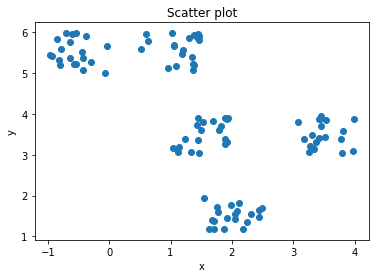

enter
-39.51469619243749
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))


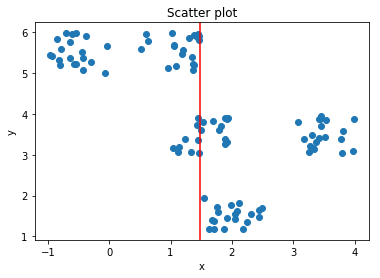

enter
7852.707890550528
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))


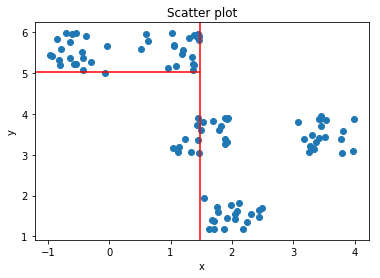

enter
-5.020120441913605
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))


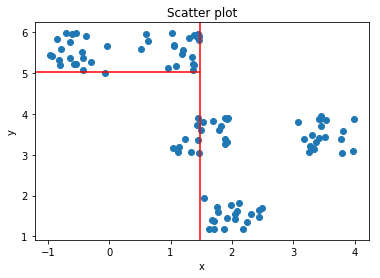

enter
-5.065505653619766
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))


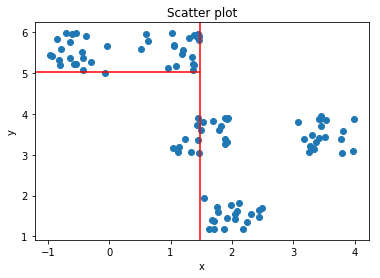

enter
185.83287884554437
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))


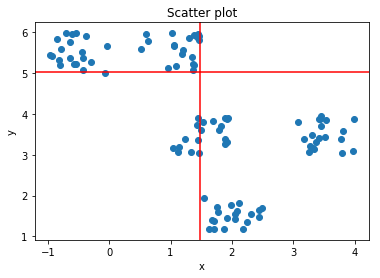

enter
-33.53825133706852
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))


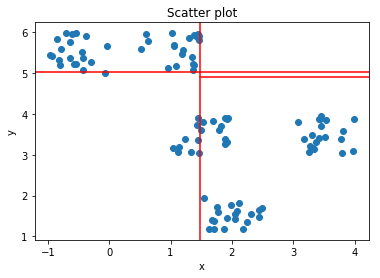

enter
-38.829272554980996
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 4.89759064]]), action=array([0.53787625, 0.055764  , 0.40635973, 1.0650212 ], dtype=float32))


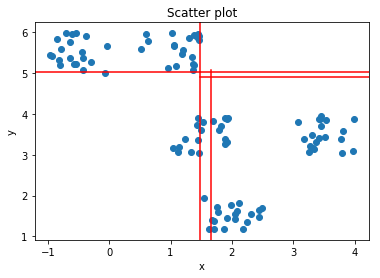

enter
-3.9003432393074036
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 4.89759064]]), action=array([0.53787625, 0.055764  , 0.40635973, 1.0650212 ], dtype=float32))


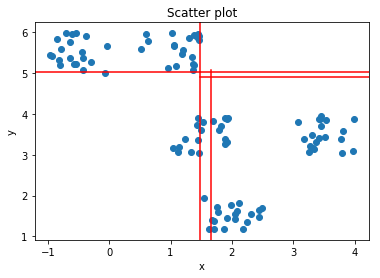

enter
-36.784499199296015
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 4.89759064]]), action=array([0.53787625, 0.055764  , 0.40635973, 1.0650212 ], dtype=float32))
StateAction(state=array([[1.66255289, 4.        ],
       [1.        , 4.89759064]]), action=array([0.11057888, 0.46948975, 0.41993135, 1

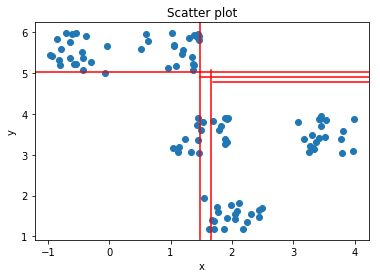

enter
-6.25
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 4.89759064]]), action=array([0.53787625, 0.055764  , 0.40635973, 1.0650212 ], dtype=float32))
StateAction(state=array([[1.66255289, 4.        ],
       [1.        , 4.89759064]]), action=array([0.11057888, 0.46948975, 0.41993135, 1.5128386 ], dt

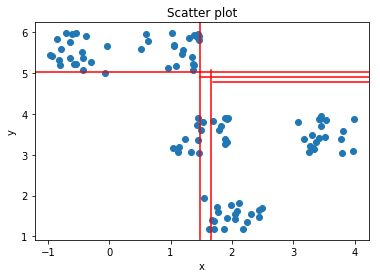

enter
-5.0
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 4.89759064]]), action=array([0.53787625, 0.055764  , 0.40635973, 1.0650212 ], dtype=float32))
StateAction(state=array([[1.66255289, 4.        ],
       [1.        , 4.89759064]]), action=array([0.11057888, 0.46948975, 0.41993135, 1.5128386 ], dty

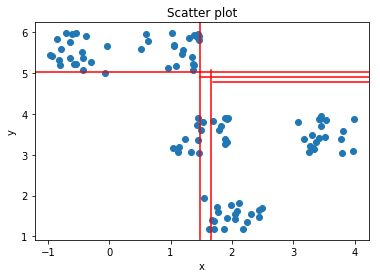

enter
-3.9682013392448425
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.60485196, 0.00274806, 0.3924001 , 0.98985153], dtype=float32))
StateAction(state=array([[-1.        ,  1.47462884],
       [ 1.        ,  6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 6.        ]]), action=array([1.5462243e-05, 5.7465374e-01, 4.2533082e-01, 1.6161067e+00],
      dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 5.04026687]]), action=array([0.04587829, 0.52554977, 0.42857197, 1.5590363 ], dtype=float32))
StateAction(state=array([[1.47462884, 4.        ],
       [1.        , 4.89759064]]), action=array([0.53787625, 0.055764  , 0.40635973, 1.0650212 ], dtype=float32))
StateAction(state=array([[1.66255289, 4.        ],
       [1.        , 4.89759064]]), action=array([0.11057888, 0.46948975, 0.41993135, 1

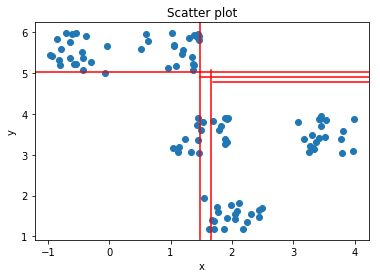

enter
-3.9682013392448425
Simulation Over


In [4]:
agent.load_network('savedModels/', 'saved.h5')
state = env.reset()
   
while True:
    action = agent.act(state,False)
    env.render()
    next_state, reward, done, _ = env.step(action)
    print(reward)
    state = next_state
    if done:
        break
        
env.close()

### 5. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  